In [10]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [11]:
with open("data2.json", "r") as fp:
  data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [13]:
model = Sequential([
  LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]),
       return_sequences=True),
  LSTM(64),
  
  Dense(64, activation='relu'),
  Dropout(0.3),
  
  # output
  Dense(3, activation='softmax')
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 259, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 57347 (224.01 KB)
Trainable params: 57347 (224.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=50)

Epoch 1/50
4/4 [==============================] - 2s 240ms/step - loss: 1.1785 - accuracy: 0.2656 - val_loss: 1.1517 - val_accuracy: 0.2188
Epoch 2/50
4/4 [==============================] - 0s 100ms/step - loss: 1.1411 - accuracy: 0.3125 - val_loss: 1.1413 - val_accuracy: 0.2812
Epoch 3/50
4/4 [==============================] - 0s 100ms/step - loss: 1.1372 - accuracy: 0.2734 - val_loss: 1.1316 - val_accuracy: 0.3438
Epoch 4/50
4/4 [==============================] - 0s 97ms/step - loss: 1.1344 - accuracy: 0.2969 - val_loss: 1.1234 - val_accuracy: 0.4062
Epoch 5/50
4/4 [==============================] - 0s 114ms/step - loss: 1.1219 - accuracy: 0.3125 - val_loss: 1.1157 - val_accuracy: 0.3438
Epoch 6/50
4/4 [==============================] - 1s 151ms/step - loss: 1.0911 - accuracy: 0.3516 - val_loss: 1.1083 - val_accuracy: 0.3125
Epoch 7/50
4/4 [==============================] - 0s 97ms/step - loss: 1.0796 - accuracy: 0.4297 - val_loss: 1.1022 - val_accuracy: 0.3438
Epoch 8/50
4/4 [======

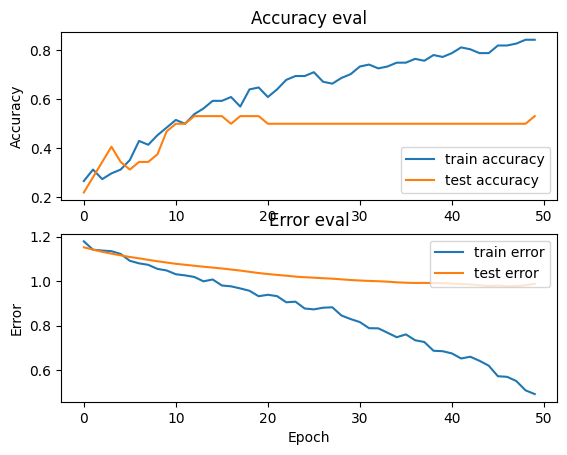

In [16]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [17]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
f'Loss: {loss}, Accuracy: {accuracy}'

1/1 - 0s - loss: 0.9882 - accuracy: 0.5312 - 59ms/epoch - 59ms/step


'Loss: 0.9882477521896362, Accuracy: 0.53125'